In [8]:
from cposp_server import CPOSPServer
from c3_base import *
CPOSPServer.factory()
cluster = boot_cluster(6)

{'key_name': u'CPOSP_key', 'flavor': <Flavor: m1.medium>, 'name': 'C3Master-b8f64805-7ca8-11e5-8645-68a86d0722f8', 'image': <Image: C3Master-Image>, 'userdata': '#!/bin/bash\ngit --git-dir=$PWD/pyTasks/.git  --work-tree=$PWD/pytasks/ pull\nsudo flower -A tasks --port=5555 --workdir=$PWD/pyTasks &\npython pyTasks/app.py\n'}
{'key_name': u'CPOSP_key', 'flavor': <Flavor: m1.medium>, 'name': 'C3Slave-c6d21b8a-7ca8-11e5-83c0-68a86d0722f8', 'image': <Image: C3Slave-Image>, 'userdata': '#!/bin/bash\nMASTER_IP=\'130.238.29.67\' \nexport C_FORCE_ROOT="true"\ngit --git-dir=$PWD/pyTasks/.git  --work-tree=$PWD/pytasks/ pull \ncelery -A tasks worker -b $MASTER_IP --workdir=$PWD/pyTasks &\n'}
{'key_name': u'CPOSP_key', 'flavor': <Flavor: m1.medium>, 'name': 'C3Slave-c7ff4e0f-7ca8-11e5-ba84-68a86d0722f8', 'image': <Image: C3Slave-Image>, 'userdata': '#!/bin/bash\nMASTER_IP=\'130.238.29.67\' \nexport C_FORCE_ROOT="true"\ngit --git-dir=$PWD/pyTasks/.git  --work-tree=$PWD/pytasks/ pull \ncelery -A tasks

In [9]:
print cluster['master']._ip

130.238.29.67


In [ ]:
for slave in cluster['slaves']:
    slave.delete()
cluster['master']._server.delete()

In [10]:
import numpy as np
%pylab inline 

def plotDict(aDict, xlabel = 'X',ylabel = 'Y',title = 'Title'):
    barWidth = 0.9
    index = numpy.arange(len(aDict))
    labels = aDict.keys()
    values = [aDict[key] for key in labels]

    rects1 = plt.bar(index,
                     values,
                     barWidth,
                     color='r',
                     #yerr=stds, # dosen't seem to vary much
                     #label=labels
                    )

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(index + barWidth/2,
               labels)
    plt.legend()
    plt.tight_layout()
    plt.show()


    return

Populating the interactive namespace from numpy and matplotlib


In [12]:
def plot_progress(job,host):
    flower_adress = '{}:5555'.format(host)
    plot_data = {}
    for task in job['task_ids']:
        task_json = os.popen('curl http://{}/api/task/info/{}'.format(flower_adress,task)).read()
        aTask = json.loads(task_json)
        (aFile,_) = eval(aTask['args'])
        plot_data.update({aFile[len('tweets_'):-len('.txt')] : aTask['runtime']})
    plotDict(plot_data, 'Tweet File', 'Time [sec]', 'Time per Tweet File')
    return plot_data
    
def evaluate_job(redirect_adress,host):
    json_job = os.popen('curl {}'.format(redirect_adress.strip())).read()
    job = json.loads(json_job)
    while job['count_finished'] != job['count_deployed']:
        time.sleep(10)
        json_job = os.popen('curl {}'.format(redirect_adress.strip())).read()
        job = json.loads(json_job)
        print '{}/{} finished'.format(job['count_finished'],job['count_deployed'])
    
    data = plot_progress(job,host)
    print job
    plotDict(job['summary'], 'Pronomen', 'Count', 'Occurences of Pronouns')
    return data

def evaluate_batch(redirect_adress,adress):
   

    data = evaluate_job(redirect_adress,adress)

    a = os.popen('curl {}:5555/api/workers?status=true'.format(adress)).read()
    objs = json.loads(a)
    workers = len (objs)
    total_time = 0
    for key in data.keys():
        total_time = total_time + data[key]
    
    results =  dict(total_time= total_time,
                    n_workers=workers,
                    time_per_worker = total_time/workers,
                    time_per_task=total_time/len(data)
                   )
    
    plotDict(results)
    return results

0/20 finished
0/20 finished
0/20 finished
0/20 finished
0/20 finished
0/20 finished
0/20 finished
0/20 finished
0/20 finished
0/20 finished
0/20 finished
0/20 finished
1/20 finished
1/20 finished
1/20 finished
1/20 finished
1/20 finished
1/20 finished
1/20 finished
1/20 finished
2/20 finished
3/20 finished
4/20 finished
5/20 finished
5/20 finished
5/20 finished
6/20 finished
10/20 finished
11/20 finished
11/20 finished
14/20 finished
15/20 finished
16/20 finished
17/20 finished
18/20 finished
18/20 finished
19/20 finished
20/20 finished


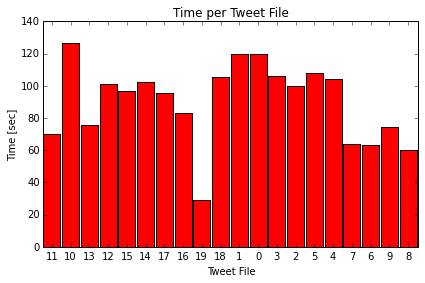

{u'count_deployed': 20, u'task_ids': [u'687ffe74-568d-46f3-90e6-e3d6c6443584', u'30398a99-a6c1-4050-8d16-32d520d1983b', u'7c39c3c5-1046-4f4d-a657-9c6df9fa9fa6', u'fa2955b4-b78c-4c5a-b448-8b149292b892', u'd815fc7d-b088-449e-80bf-d1efac7b5d5d', u'9ca1dcfa-37a5-403d-842b-5846d878dda9', u'9cbea30d-b4b5-44a0-b995-876e73c3dc82', u'9f3df50d-5c12-4191-a2f1-4e595c42bd5d', u'bd3a23cf-8119-469d-bb84-3f64ac3ccdb8', u'db4f0358-eec8-4e85-ba6e-c74e1b2d995a', u'5298a297-701b-4794-a8bb-2ebc4f4e9adf', u'76b09031-3460-4a5c-96d7-90ed9bf0f5e2', u'87c96e2b-429f-4723-905e-bcec387d4363', u'29ef0564-68d5-4af6-9e09-b5acca5127d6', u'198b64cc-96e2-4686-a88d-1adef45befe6', u'2f5dc4ec-4b42-41c7-acc6-d761bce8d781', u'e498bacb-a343-406a-a89f-45ebf7ee0a8f', u'ec5ce5f3-990c-4ac6-9980-6b24b143b7ee', u'ab545997-1b27-4234-bca0-df2443aa43c2', u'9e42ccef-08cb-440d-96d6-9ee9c77cc679'], u'count_finished': 20, u'id': u'edb2fea4-7ca8-11e5-9a7b-fa163e9955e6', u'summary': {u'han': 758152, u'hon': 414580, u'det': 501641, u'denne':

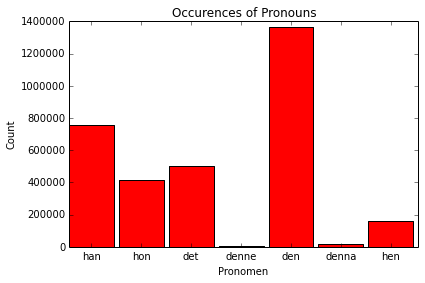

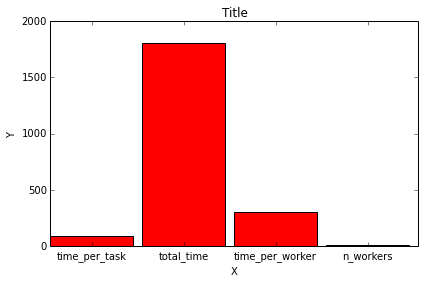

In [15]:
import time
import os
import json
adress = cluster['master']._ip
##Triggers Job & Redirect to Job Collector
redirect = os.popen('curl -i http://{}:5000/countwords | grep Location'.format(adress)).read()
redirect_adress = redirect[len('Location: '):]

## Loops until job is finished 
work_result = evaluate_batch(redirect_adress,adress)

In [16]:
print work_result

{'time_per_task': 90.26979749394998, 'total_time': 1805.3959498789995, 'time_per_worker': 300.89932497983324, 'n_workers': 6}


4
2
OrderedDict([('04', 25.360401549512503), ('08', 12.963398075574997), ('12', 7.4369003966874985), ('16', 7.872195404446876)])


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


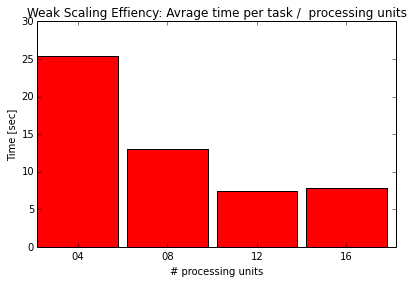

In [7]:
import collections
results  = [
            {'time_per_task': 125.95512647115001, 'total_time': 2519.1025294230003, 'time_per_worker': 314.88781617787504, 'n_workers': 8}, #Result of 8 workers
            {'time_per_task': 89.24280476024998, 'total_time': 1784.8560952049997, 'time_per_worker': 297.47601586749994, 'n_workers': 6},  #Result of 6 workers
            {'time_per_task': 103.70718460459997, 'total_time': 2074.1436920919996, 'time_per_worker': 518.5359230229999, 'n_workers': 4},  #Result of 4 workers
            {'time_per_task': 101.44160619805001, 'total_time': 2028.8321239610002, 'time_per_worker': 1014.4160619805001, 'n_workers': 2}  #Result of 2 workers
           ]
formated = {}
for result in results:
    if  int(result['n_workers']*2) < 10 :
        print result['n_workers']
        processing_units = '0' + str(result['n_workers']*2)
    else:
        processing_units = str(result['n_workers']*2)
        
    formated.update({'{}'.format(processing_units) : result['time_per_task']/int(processing_units)})

print collections.OrderedDict(sorted(formated.items()))
plotDict(collections.OrderedDict(sorted(formated.items())), '# processing units', 'Time [sec]' ,'Weak Scaling Effiency: Avrage time per task /  processing units')